In [1]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [2]:
df = pd.read_json("results/multivariate/mae.json")

In [3]:
datasets = df.columns.tolist()
contexts = df.index.tolist()
TARGET_LEN=96
new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [4]:
df

,national_illness,exchange_rate,etth2,etth1,ettm1,ettm2,weather
patchtst_104,1.489344,NaN,NaN,NaN,NaN,NaN,NaN
timemixer_96,0.973360,0.209628,0.306914,0.473595,0.434218,0.234528,0.221931
itransformer_96,1.530524,0.229580,0.301481,0.460570,0.419593,0.241877,0.222640
vaformer_96,0.904457,0.217358,0.293814,0.457227,0.418255,0.231557,0.205074
moment_512,1.180553,0.241170,0.300821,0.459601,0.371468,0.286987,0.209376
samformer_512,1.542404,0.372909,0.345126,0.574321,0.530049,0.275360,0.322345
crossformer_60,1.515546,NaN,NaN,NaN,NaN,NaN,NaN
crossformer_96,NaN,0.339803,NaN,NaN,NaN,NaN,NaN
patchtst_336,NaN,0.223509,0.300685,0.485919,0.372185,0.222996,0.199529
crossformer_168,NaN,NaN,0.321503,0.456795,NaN,NaN,0.228256


In [5]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [6]:
merged_df

,national_illness,exchange_rate,etth2,etth1,ettm1,ettm2,weather
model,,,,,,,
crossformer,1.515546,0.339803,0.321503,0.456795,0.388197,0.235773,0.228256
itransformer,1.530524,0.229580,0.301481,0.460570,0.419593,0.241877,0.222640
moment,1.180553,0.241170,0.300821,0.459601,0.371468,0.286987,0.209376
patchtst,1.489344,0.223509,0.300685,0.485919,0.372185,0.222996,0.199529
samformer,1.542404,0.372909,0.345126,0.574321,0.530049,0.275360,0.322345
timemixer,0.973360,0.209628,0.306914,0.473595,0.434218,0.234528,0.221931
vaformer,0.904457,0.217358,0.293814,0.457227,0.418255,0.231557,0.205074


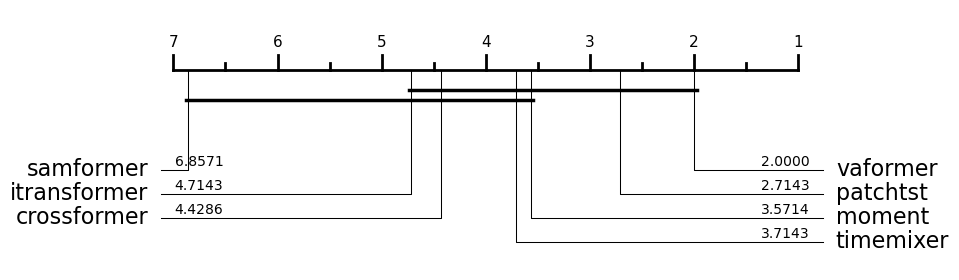

In [7]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  